---

**CSE475: Machine Learning** - (Section-05)

**Assignment 1:** Ensemble Learning and Explainable AI

---



**Group G Information:**

Raiyan Gani (2021-2-60-120)

Maherun Nessa Isty (2021-2-60-086)

Rifat Ara Rimi (2020-2-60-093)

Nushera Tajrin Mimu (2021-3-60-227)

---

**Faculty Information:**

Dr. Mohammad Rifat Ahmmad Rashid

Associate Professor

Department of Computer Science & Engineering

---

#Data Description

Dataset Name: Heart Disease Prediction Dataset

Link: https://www.kaggle.com/datasets/krishujeniya/heart-diseae?resource=download

**Columns**

age: Age of the patient (in years)

sex: Sex of the patient (1 = male, 0 = female)

cp: Chest pain type (1-4)

trestbps: Resting blood pressure (in mm Hg on admission to the hospital)

chol: Serum cholesterol in mg/dl

fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg: Resting electrocardiographic results (0-2)

thalach: Maximum heart rate achieved

exang: Exercise-induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest




#Load and preporcess Dataset

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import f_oneway
import scipy.stats as ss
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [ ]:
!gdown --id 1lRnjf1TzVEO-e_GvCtTYd1hTaj5msLim

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1lRnjf1TzVEO-e_GvCtTYd1hTaj5msLim
To: /content/heart_disease.zip
100% 3.49k/3.49k [00:00<00:00, 11.7MB/s]


In [ ]:
#Unzip the file
!unzip '/content/heart_disease.zip'

Archive:  /content/heart_disease.zip
  inflating: heart-disease.csv       


In [ ]:
#add data to df
df= pd.read_csv('/content/heart-disease.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Rename the columns
df.rename(columns={
    'cp': 'chest_pain',
    'trestbps': 'resting_bp',
    'chol': 'cholesterol',
    'restecg' : 'rest_ECardiographic',
    'thalach' : 'max_heartRate'
}, inplace=True)

In [ ]:
# Display the DataFrame to verify the changes
df.head()

,age,sex,chest_pain,resting_bp,cholesterol,fbs,rest_ECardiographic,max_heartRate,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholesterol          303 non-null    int64  
 5   fbs                  303 non-null    int64  
 6   rest_ECardiographic  303 non-null    int64  
 7   max_heartRate        303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.shape

(303, 14)

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

age: [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex: [1 0]
chest_pain: [3 2 1 0]
resting_bp: [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
cholesterol: [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 24

In [ ]:
nan_columns = df.columns[df.isna().any()].tolist()
print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


In [ ]:
# Classify columns by data type
object_columns = df.select_dtypes(include='object').columns.tolist()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Object columns:", object_columns)
print("Numeric columns:", numeric_columns)

Object columns: []
Numeric columns: ['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol', 'fbs', 'rest_ECardiographic', 'max_heartRate', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [ ]:
df.describe()

,age,sex,chest_pain,resting_bp,cholesterol,fbs,rest_ECardiographic,max_heartRate,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


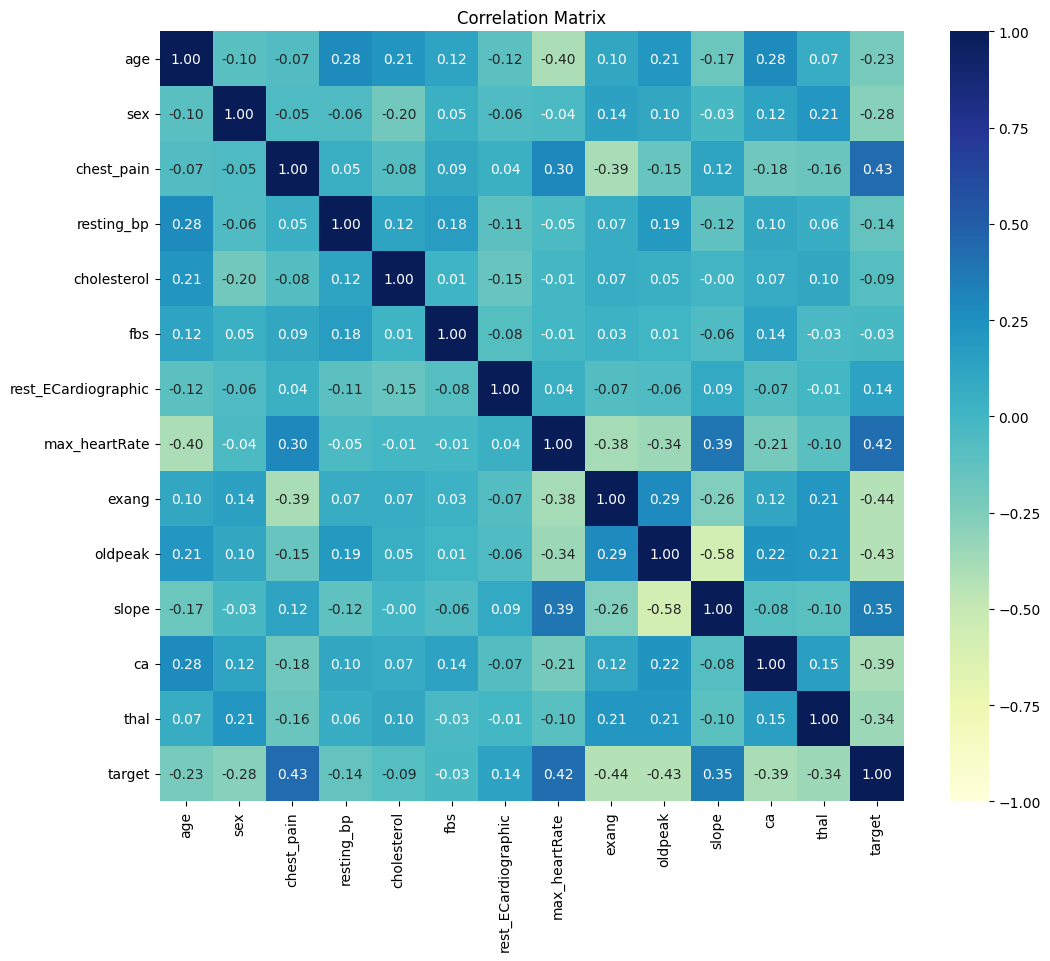

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter columns to include only numeric types (int64 and float)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-15-c8057914bbee>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_others.index, y=correlation_with_others.values, palette='coolwarm')


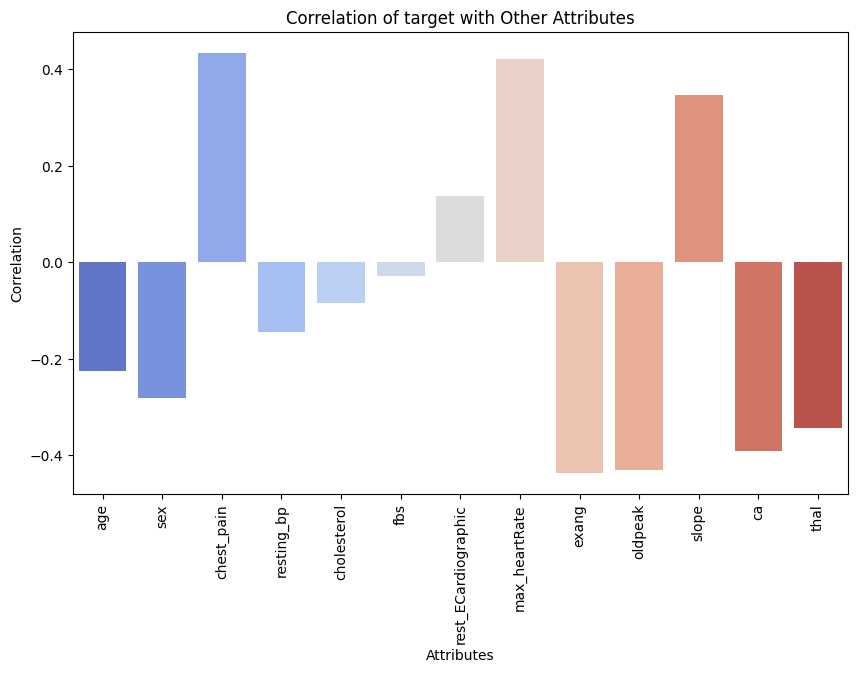

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Filter columns to include only int64 and float64 types
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Choose the attribute to analyze
chosen_attribute = 'target'  # Replace with your attribute name

# Check if the chosen attribute is in the DataFrame
if chosen_attribute not in numeric_df.columns:
    raise ValueError(f"{chosen_attribute} is not in the DataFrame")

# Compute the correlation of the chosen attribute with all other attributes
correlation_with_others = numeric_df.corr()[chosen_attribute]

# Drop the self-correlation (which is always 1) for plotting
correlation_with_others = correlation_with_others.drop(chosen_attribute)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_others.index, y=correlation_with_others.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Attributes')
plt.ylabel('Correlation')
plt.title(f'Correlation of {chosen_attribute} with Other Attributes')
plt.show()


#Unsupervised Learning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

##Preprocess

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming df is already defined with the dataset
# Split the features into categorical and numerical
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Standard scaling for numerical features only
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(df[numerical_features])

# One-hot encoding for categorical features only
# The 'sparse' parameter is removed for compatibility with older versions
# If using a newer version, you might need to adjust this
encoder = OneHotEncoder(drop='first')
encoded_categorical_data = encoder.fit_transform(df[categorical_features]).toarray()
# toarray() is added to convert the sparse matrix to a dense array if needed

# Concatenate the scaled numerical and encoded categorical data
processed_data = np.hstack([scaled_numerical_data, encoded_categorical_data])

# Convert to DataFrame with appropriate column names
final_columns = numerical_features.tolist() + encoder.get_feature_names_out(categorical_features).tolist()
processed_data_df = pd.DataFrame(processed_data, columns=final_columns)

# Save processed data to CSV
processed_data_df.to_csv('processed_data.csv', index=False)

# Display the first few rows of the processed DataFrame
processed_data_df.head()

,age,sex,chest_pain,resting_bp,cholesterol,fbs,rest_ECardiographic,max_heartRate,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529


In [ ]:
processed_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    float64
 1   sex                  303 non-null    float64
 2   chest_pain           303 non-null    float64
 3   resting_bp           303 non-null    float64
 4   cholesterol          303 non-null    float64
 5   fbs                  303 non-null    float64
 6   rest_ECardiographic  303 non-null    float64
 7   max_heartRate        303 non-null    float64
 8   exang                303 non-null    float64
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    float64
 11  ca                   303 non-null    float64
 12  thal                 303 non-null    float64
 13  target               303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


###Apply Clustering

**Elbow Method**
The Elbow Method can help identify the optimal number of clusters for K-Means by plotting the Within-Cluster Sum of Squares (WCSS) for different values of
𝑘
k and looking for an "elbow" point where the rate of decrease sharply diminishes. This point suggests a good balance between cluster compactness and complexity.

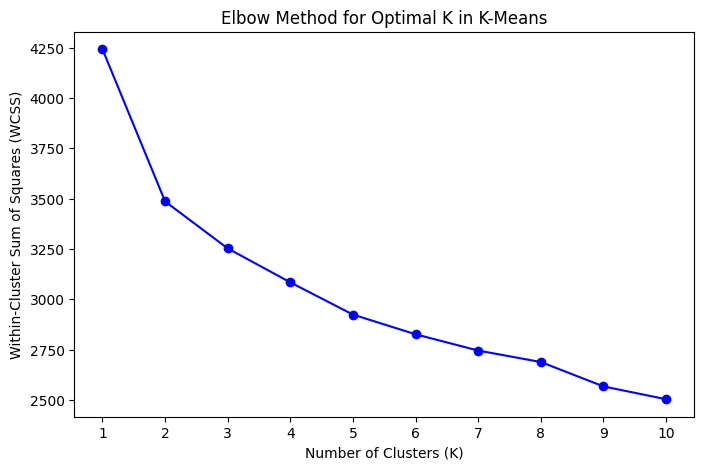

In [ ]:
# Calculate WCSS for a range of K values to use the Elbow Method
wcss = []
k_range = range(1, 11)  # Range of K values from 1 to 10

# Iterate through each k and calculate WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_data_df)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K in K-Means")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(k_range)
plt.show()


In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Define number of clusters for K-Means
n_clusters = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
processed_data_df['KMeans_Cluster'] = kmeans.fit_predict(processed_data_df)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
processed_data_df['DBSCAN_Cluster'] = dbscan.fit_predict(processed_data_df)

# PCA for 2D visualization
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster']))
processed_data_df['PCA1'] = pca_result[:, 0]
processed_data_df['PCA2'] = pca_result[:, 1]

# Calculate evaluation scores only if DBSCAN has more than one cluster
silhouette_kmeans = silhouette_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']),
                                     processed_data_df['KMeans_Cluster'])

# Check for the number of clusters in DBSCAN, DBSCAN assigns -1 to noise points, so we count unique labels
unique_dbscan_labels = len(set(processed_data_df['DBSCAN_Cluster']) - {-1})  # Exclude noise (-1) label
silhouette_dbscan = None
dbi_dbscan = None

if unique_dbscan_labels > 1:
    silhouette_dbscan = silhouette_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']),
                                         processed_data_df['DBSCAN_Cluster'])
    dbi_dbscan = davies_bouldin_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']),
                                      processed_data_df['DBSCAN_Cluster'])
else:
    print("DBSCAN has only one cluster or all points are labeled as noise, skipping DBSCAN evaluation.")

dbi_kmeans = davies_bouldin_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']),
                                  processed_data_df['KMeans_Cluster'])

# Print evaluation scores
print(f"Silhouette Score (K-Means): {silhouette_kmeans}")
if silhouette_dbscan is not None:
    print(f"Silhouette Score (DBSCAN): {silhouette_dbscan}")
else:
    print("Silhouette Score (DBSCAN): Not available")

if dbi_dbscan is not None:
    print(f"Davies-Bouldin Index (DBSCAN): {dbi_dbscan}")
else:
    print("Davies-Bouldin Index (DBSCAN): Not available")

print(f"Davies-Bouldin Index (K-Means): {dbi_kmeans}")


DBSCAN has only one cluster or all points are labeled as noise, skipping DBSCAN evaluation.
Silhouette Score (K-Means): 0.17840317146321374
Silhouette Score (DBSCAN): Not available
Davies-Bouldin Index (DBSCAN): Not available
Davies-Bouldin Index (K-Means): 2.0643264163504855


DBSCAN (Density-Based Spatial Clustering of Applications with Noise) can label all data points as noise if the eps parameter is too small or the dataset does not contain sufficiently dense clusters. When this happens, the algorithm assigns all points to the same cluster or labels them as noise (-1), making it impossible to compute the evaluation metrics that require multiple clusters.

##PCA

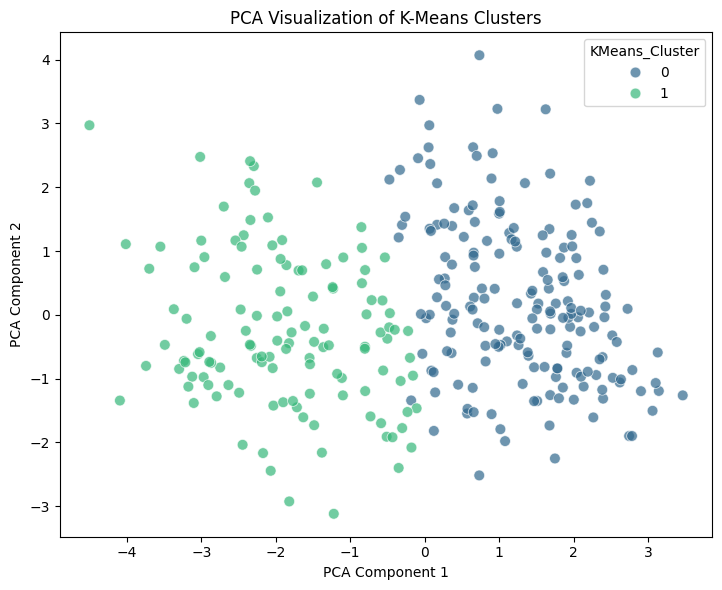

In [ ]:
# Plot PCA visualization for K-Means and DBSCAN clusters
plt.figure(figsize=(14, 6))

# Plot for K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(data=processed_data_df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("PCA Visualization of K-Means Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.tight_layout()
plt.show()


##GMM

Silhouette Score (GMM): 0.16219596499631675
Davies-Bouldin Index (GMM): 2.1841527638371687


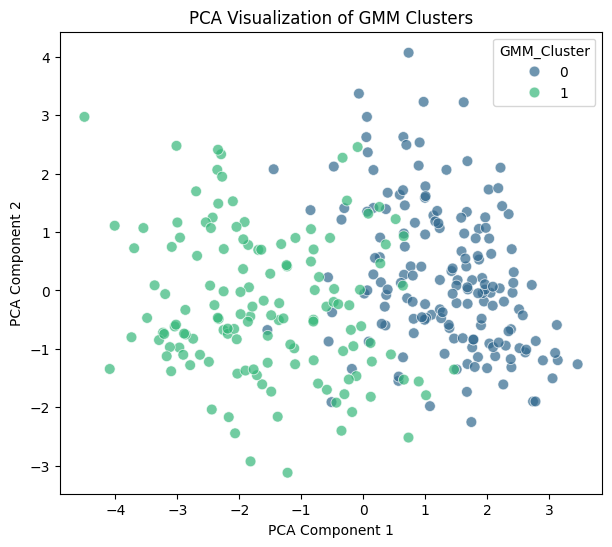

In [ ]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model with the same number of clusters as K-Means (6 clusters)
gmm = GaussianMixture(n_components=2, random_state=42)
processed_data_df['GMM_Cluster'] = gmm.fit_predict(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'PCA1', 'PCA2']))

# Calculate silhouette and Davies-Bouldin scores for GMM
silhouette_gmm = silhouette_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'PCA1', 'PCA2']),
                                  processed_data_df['GMM_Cluster'])
dbi_gmm = davies_bouldin_score(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'PCA1', 'PCA2']),
                               processed_data_df['GMM_Cluster'])

# Print the evaluation scores for GMM
print(f"Silhouette Score (GMM): {silhouette_gmm}")
print(f"Davies-Bouldin Index (GMM): {dbi_gmm}")

# PCA visualization for GMM clusters
plt.figure(figsize=(7, 6))
sns.scatterplot(data=processed_data_df, x='PCA1', y='PCA2', hue='GMM_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("PCA Visualization of GMM Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


##Visualization using t-SNE

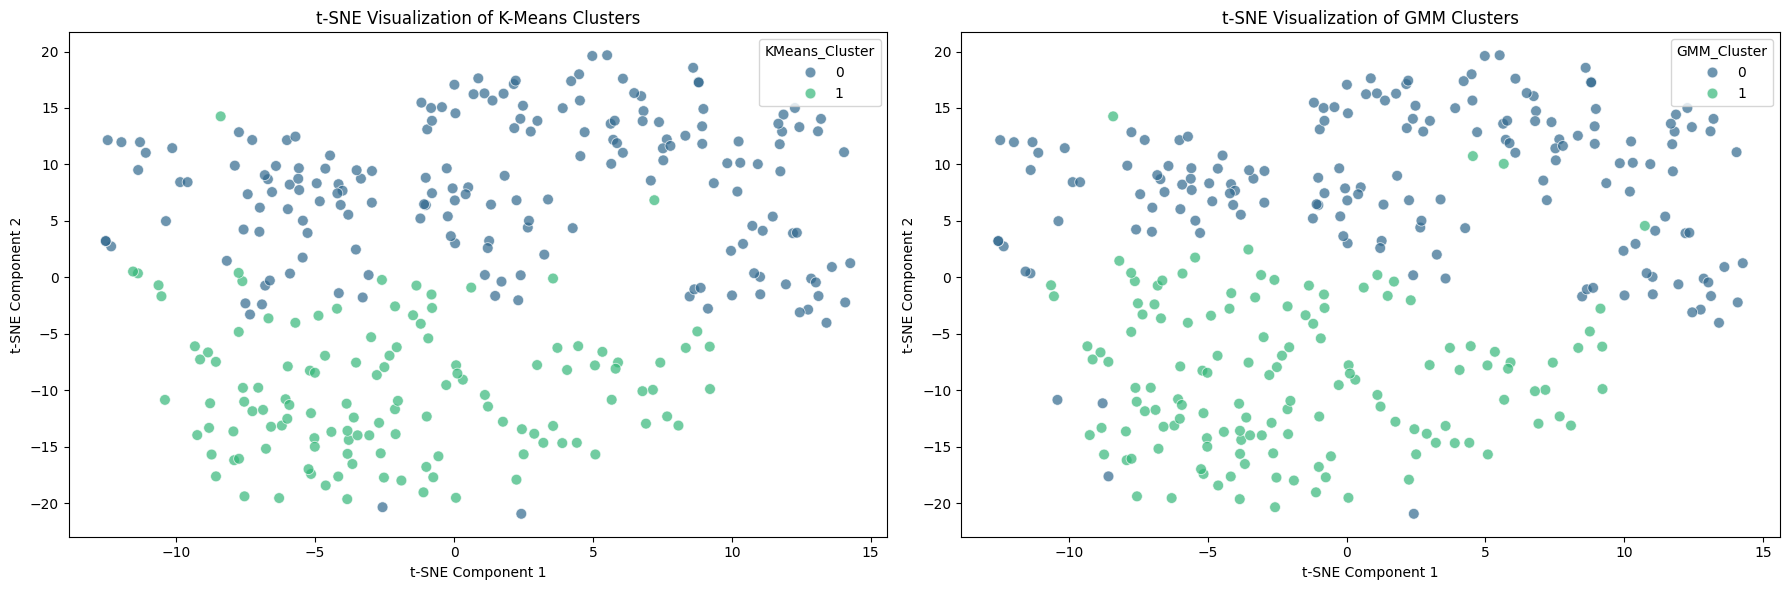

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(processed_data_df.drop(columns=['KMeans_Cluster', 'DBSCAN_Cluster', 'GMM_Cluster', 'PCA1', 'PCA2']))


# Add t-SNE results to the DataFrame
processed_data_df['tSNE1'] = tsne_result[:, 0]
processed_data_df['tSNE2'] = tsne_result[:, 1]

# Plot t-SNE visualization for K-Means, DBSCAN, and GMM clusters
plt.figure(figsize=(18, 6))

# Plot for K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(data=processed_data_df, x='tSNE1', y='tSNE2', hue='KMeans_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("t-SNE Visualization of K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")

# Plot for GMM
plt.subplot(1, 2, 2)
sns.scatterplot(data=processed_data_df, x='tSNE1', y='tSNE2', hue='GMM_Cluster', palette='viridis', s=60, alpha=0.7)
plt.title("t-SNE Visualization of GMM Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")


plt.tight_layout()
plt.show()


# Data Preprocessing
- Handle missing values, if any.
- Encode categorical variables.
- Feature scaling (if necessary)

In [ ]:
# Drop the 'User ID' column as it is not needed for supervised learning
X = df.drop(['target'], axis=1)
y = df['target']-1

# Split the features into categorical and numerical
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Standard scaling for numerical features only
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(X[numerical_features])

# One-hot encoding for categorical features only
encoder = OneHotEncoder(drop='first')
encoded_categorical_data = encoder.fit_transform(X[categorical_features])

# Concatenate the scaled numerical and encoded categorical data
processed_data = np.hstack([scaled_numerical_data, encoded_categorical_data.toarray()])

# Convert to DataFrame with appropriate column names
final_columns = numerical_features.tolist() + encoder.get_feature_names_out(categorical_features).tolist()
final_df = pd.DataFrame(processed_data, columns=final_columns)

data_X = final_df.copy()

In [ ]:
data_X.head()

,age,sex,chest_pain,resting_bp,cholesterol,fbs,rest_ECardiographic,max_heartRate,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


Dataset Split

In [ ]:
X = data_X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

## Bagging Approach: Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Random Forest Accuracy: 0.8688524590163934


## Boosting Approach: Gradient Boosting

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


Gradient Boosting Accuracy: 0.8524590163934426


## Stacking Approach
- Use a meta-classifier (e.g., Logistic Regression) on top of base learners

In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier


# Define base models
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=50, random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Set up the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stacking_model.fit(X_train, y_train)
stacking_pred = stacking_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, stacking_pred))

# Define meta-learner
meta_learner = LogisticRegression()

# Set up the stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stacking_model.fit(X_train, y_train)

Stacking Model Accuracy: 0.8524590163934426


StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=50,
                                                           random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

## Voting Classifier
- Combine multiple classifiers by voting.

In [ ]:
vote_model = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
        ('svc', SVC(probability=True))
    ],
    voting='soft'
)
vote_model.fit(X_train, y_train)
vote_pred = vote_model.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, vote_pred))


Voting Classifier Accuracy: 0.8524590163934426


## Evaluation
- Compare the performance of all models.


In [ ]:
print("Random Forest:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting:", accuracy_score(y_test, gb_pred))
print("Stacking Model:", accuracy_score(y_test, stacking_pred))
print("Voting Classifier:", accuracy_score(y_test, vote_pred))


Random Forest: 0.8688524590163934
Gradient Boosting: 0.8524590163934426
Stacking Model: 0.8524590163934426
Voting Classifier: 0.8524590163934426


# Cross-Validation Performance Comparison
* Use cross_val_score from sklearn.model_selection to perform cross-validation and evaluate each ensemble model's accuracy across folds.
* Set cv=5 for 5-fold cross-validation (can be adjusted based on preference or dataset size).

In [ ]:
from sklearn.model_selection import cross_val_score

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        final_estimator=LogisticRegression()
    ),
    "Voting": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=50, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        voting='soft'
    )
}

# Perform cross-validation and store results
results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, data_X, y, cv=5, scoring='accuracy')
    results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Random Forest Cross-Validation Accuracy: 0.8381 ± 0.0442
Gradient Boosting Cross-Validation Accuracy: 0.8150 ± 0.0558
Stacking Cross-Validation Accuracy: 0.8347 ± 0.0589
Voting Cross-Validation Accuracy: 0.8281 ± 0.0546


##  Visualizing Cross-Validation Results

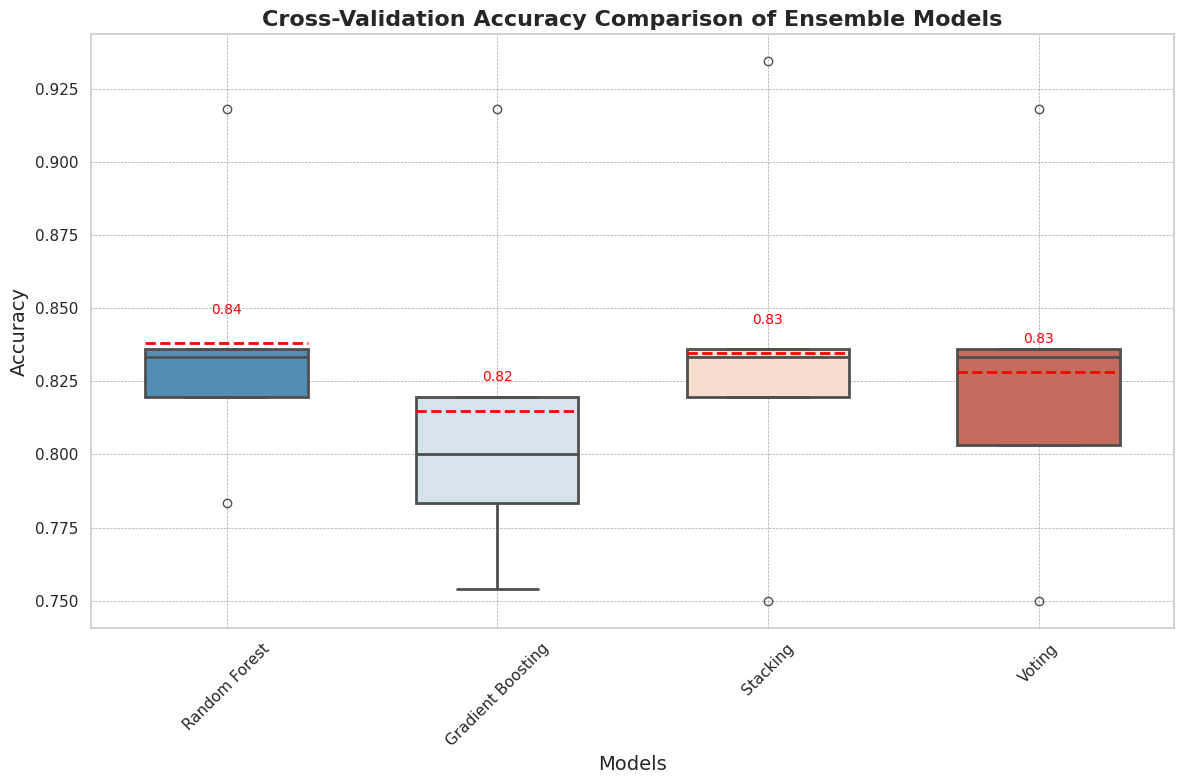

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Prepare results for visualization
import pandas as pd
results_df = pd.DataFrame(results)

# Set a modern style
sns.set_theme(style="whitegrid")

# Create a boxplot with enhancements
plt.figure(figsize=(12, 8))
palette = sns.color_palette("RdBu_r", len(results_df.columns))  # Add color variety
box = sns.boxplot(data=results_df, palette=palette, linewidth=2, width=0.6,showmeans=True,
                  meanline=True, meanprops={"color": "red", "linestyle": "--", "linewidth": 2})

# Enhance title and labels
plt.title("Cross-Validation Accuracy Comparison of Ensemble Models", fontsize=16, weight="bold")
plt.ylabel("Accuracy", fontsize=14)
plt.xlabel("Models", fontsize=14)
plt.xticks(rotation=45)

# Add gridlines
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Highlight means values
for i, column in enumerate(results_df.columns):
    mean_val = results_df[column].mean()
    plt.text(i, mean_val + 0.01, f"{mean_val:.2f}", color="red", ha="center", fontsize=10)

plt.tight_layout()
plt.show()

## Confusion Matrix for Each Model

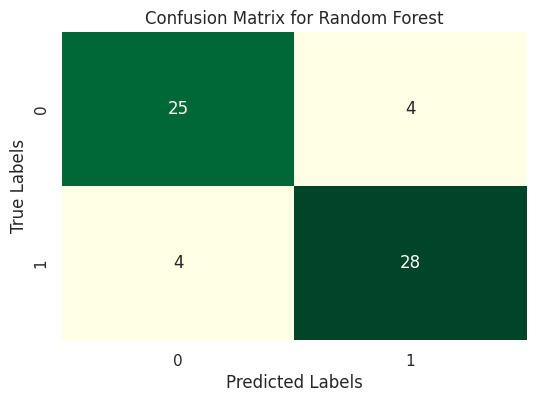

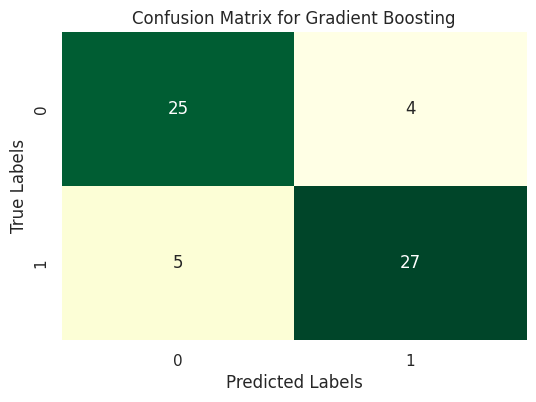

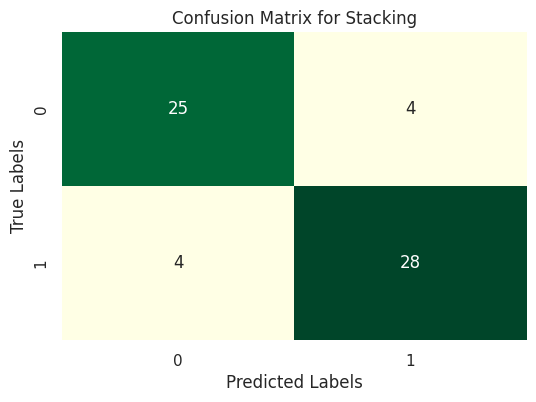

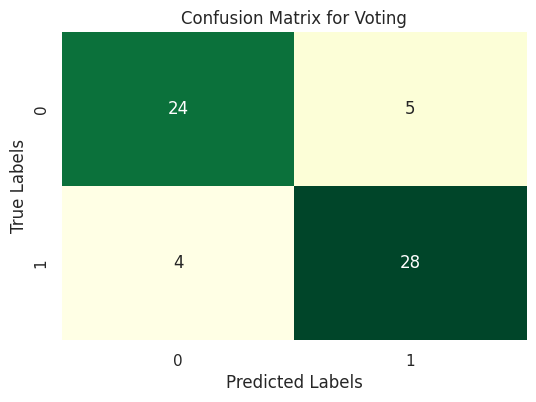

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit each model on the training data and plot the confusion matrix for each
for model_name, model in models.items():
    # Fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGn", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


## Precision and Recall for Each Model

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Fit each model on the training data and calculate precision, recall, and F1-score
for model_name, model in models.items():
    # Fit the model and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the metrics
    print(f"{model_name} Performance Metrics:")
    print(f" - Precision: {precision:.4f}")
    print(f" - Recall: {recall:.4f}")
    print(f" - F1 Score: {f1:.4f}\n")


Random Forest Performance Metrics:
 - Precision: 0.8689
 - Recall: 0.8689
 - F1 Score: 0.8689

Gradient Boosting Performance Metrics:
 - Precision: 0.8531
 - Recall: 0.8525
 - F1 Score: 0.8525

Stacking Performance Metrics:
 - Precision: 0.8689
 - Recall: 0.8689
 - F1 Score: 0.8689

Voting Performance Metrics:
 - Precision: 0.8526
 - Recall: 0.8525
 - F1 Score: 0.8523



## Summary of Metrics

In [ ]:
# Collect all metrics in a DataFrame for summary
metrics_summary = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    metrics_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert to DataFrame
import pandas as pd
metrics_df = pd.DataFrame(metrics_summary)

# Display the summary
print("Model Performance Summary:")
metrics_df

Model Performance Summary:


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.868852,0.868852,0.868852,0.868852
1,Gradient Boosting,0.852459,0.853076,0.852459,0.852538
2,Stacking,0.868852,0.868852,0.868852,0.868852
3,Voting,0.852459,0.852601,0.852459,0.852300


# Explainable AI (XAI)

## Explaining Model Predictions Using SHAP
SHAP provides detailed insights into feature contributions for individual predictions and the overall model. We'll compute SHAP values for the Random Forest model as an example, but this approach can be extended to other models as well.

In [ ]:
import shap

# Use a subset of the data for SHAP to reduce computation time
# Take a sample size that is less than or equal to the number of rows in X_test
sample_size = min(100, X_test.shape[0])  # Ensure sample size is not larger than X_test
X_sample = X_test.sample(sample_size, random_state=42)


# Initialize SHAP explainer for the Random Forest model
explainer = shap.TreeExplainer(models["Random Forest"])
shap_values = explainer.shap_values(X_sample)

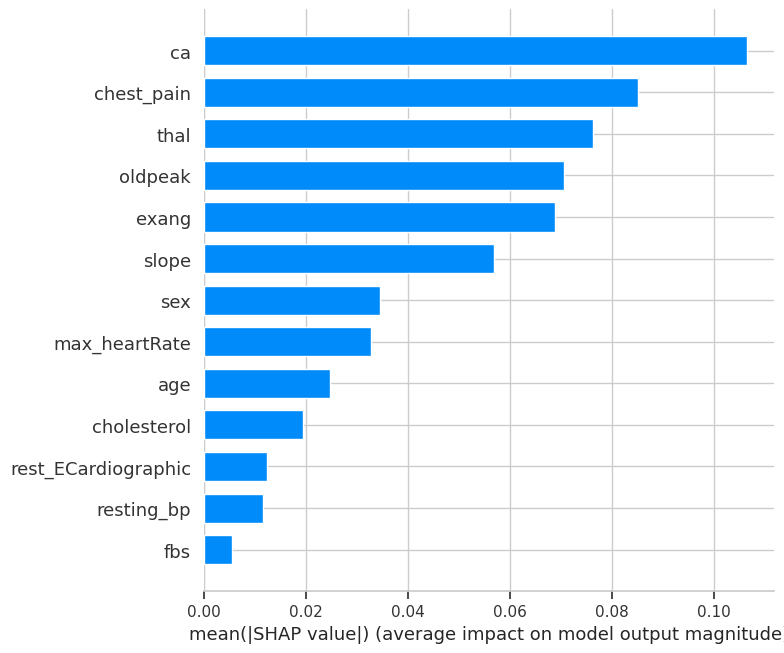

In [ ]:
import numpy as np

# Calculate mean absolute SHAP values across all classes for each feature
mean_shap_values = np.mean([np.abs(sv) for sv in shap_values], axis=0)  # Resulting shape should be (100, 12) to match X_sample

# If mean_shap_values is (12, 5), take the mean across classes, resulting in a vector (12, )
mean_shap_values = np.mean(mean_shap_values, axis=1)

# Repeat this vector to create a matrix that matches X_sample's shape
mean_shap_values_repeated = np.tile(mean_shap_values, (X_sample.shape[0], 1))

# Plot the summary plot with the repeated matrix
shap.summary_plot(mean_shap_values_repeated, X_sample, plot_type="bar", feature_names=X_sample.columns)


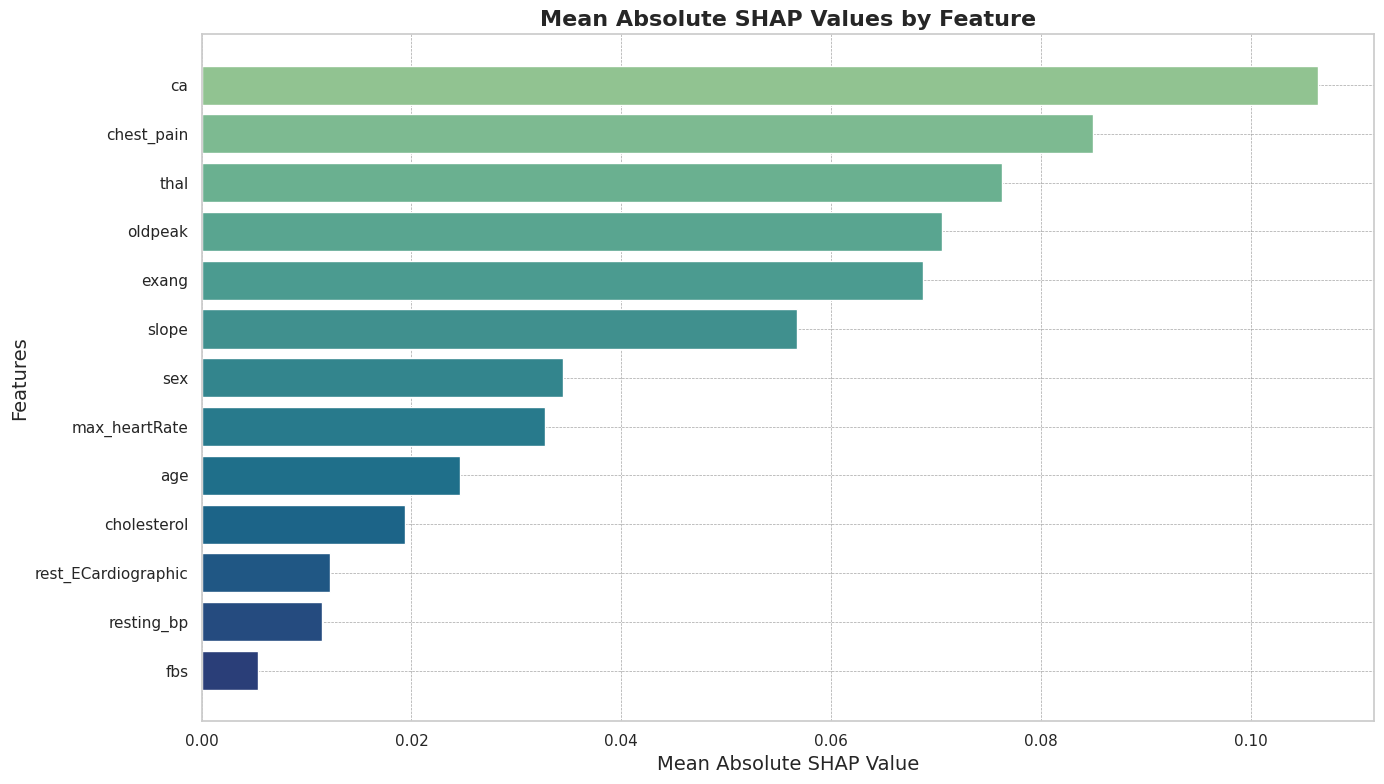

In [ ]:
import numpy as np
import seaborn as sns
import shap
import matplotlib.pyplot as plt

# Calculate mean absolute SHAP values across all classes for each feature
mean_shap_values = np.mean([np.abs(sv) for sv in shap_values], axis=0)  # Resulting shape should match X_sample

# Take the mean across classes, resulting in a vector (12, )
mean_shap_values = np.mean(mean_shap_values, axis=1)

sorted_indices = np.argsort(mean_shap_values)[::-1]
sorted_shap_values = mean_shap_values[sorted_indices]
sorted_features = X_sample.columns[sorted_indices]

# Set a color palette
colors = sns.color_palette("crest", len(sorted_features))

# Create a bar plot
plt.figure(figsize=(14, 8))
plt.barh(sorted_features, sorted_shap_values, color=colors)
plt.title("Mean Absolute SHAP Values by Feature", fontsize=16, weight="bold")
plt.xlabel("Mean Absolute SHAP Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


## Explaining Model Predictions Using LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=a8a90a8eb45d1e5e58cb7d04a62490b39ef1cd9fe9d0c2cb4786b0f86813d6d5
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer


# Get the unique class labels from the training data's target column (e.g., y_train)
class_labels = sorted(y_train.unique())  # Replace with your target variable names if needed

# Initialize the LIME explainer
lime_explainer = LimeTabularExplainer(
    X_train.values,  # Features of the training set as a numpy array
    feature_names=X_train.columns,  # Column names of features
    class_names=class_labels,  # Class labels
    mode='classification'  # Set mode to 'classification' for classification tasks
)

# Choose a sample from the test set to explain
sample_index = 0  # Adjust this index to analyze a different sample
exp = lime_explainer.explain_instance(
    X_test.values[sample_index],  # Sample instance from the test set
    models["Random Forest"].predict_proba,  # Prediction function
    num_features=10  # Number of features to display in the explanation
)

# Display the explanation
exp.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
